In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더
from torch.utils.data import Dataset
import matplotlib.pyplot as plt  # 맷플롯립사용
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import random
from sklearn.datasets import load_digits



--- 
 - 다층 퍼셉트론으로 손글씨 분류하기 
   - 이번 챕터에서는 다층 퍼셉트론을 구현하고, 딥 러닝을 통해서 숫자 필기 데이터를 분류해봅시다. 
   - MNIST 데이터랑 다른 데이터입니다. 


--- 
 - 숫자 필기 데이터 소개 
   - 숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터입니다. 
   - 0부터 9까지의 숫자를 손으로 쓴 이미지 데이터로 load_digits() 명령으로 로드할 수 있습니다. 
   - 각 이미지는 0부터 15까지의 명암을 가지는 8 × 8 = 64 픽셀 해상도의 흑백 이미지입니다. 
   - 그리고 해당 이미지가 1,797개가 있습니다. 
   - load_digits()를 통해 이미지 데이터를 로드할 수 있습니다. 
   - 로드한 전체 데이터를 digits에 저장합니다. 


len(digits.images) : 1797


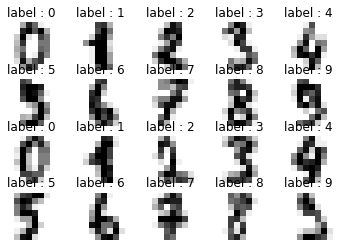

In [2]:


digits = load_digits()
mu.log("len(digits.images)", len(digits.images))

images_labels = list(zip(digits.images, digits.target))
sub_sample_size = 20

for i, (image, label) in enumerate(images_labels[:sub_sample_size]):
    plt.subplot(4, 5, i + 1)
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title("label : {}".format(label))

plt.show()



--- 
 - 다층 퍼셉트론 분류기 만들기 



model : 
    Sequential(
      (0): Linear(in_features=64, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=16, bias=True)
      (3): ReLU()
      (4): Linear(in_features=16, out_features=10, bias=True)
    ) 
    0.weight    torch.Size([32, 64])
        tensor([[-0.0386,  0.0412,  0.1178,  ...,  0.0311, -0.0606, -0.0484],
            [-0.0517, -0.0919, -0. ...
    0.bias    torch.Size([32])
        tensor([ 1.0912e-01, -1.9579e-03,  2.5450e-02, -8.0355e-02,  9.9445e-03,
            -4.7600e-03,  2.334 ...
    2.weight    torch.Size([16, 32])
        tensor([[-0.0206, -0.0037, -0.1097,  0.0198,  0.1406, -0.0826, -0.1028,  0.1308,
              0.0876, - ...
    2.bias    torch.Size([16])
        tensor([ 0.1531,  0.0892, -0.1316,  0.1750, -0.0848, -0.0073,  0.1031,  0.0524,
            -0.1412,  0. ...
    4.weight    torch.Size([10, 16])
        tensor([[ 9.7835e-02, -5.0886e-02,  2.3669e-01, -2.1941e-01, -1.2871e-01,
              2.4931e-

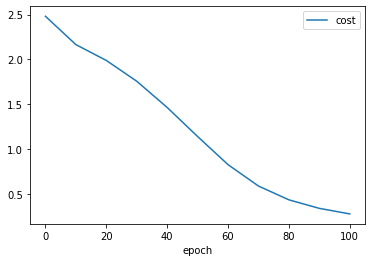

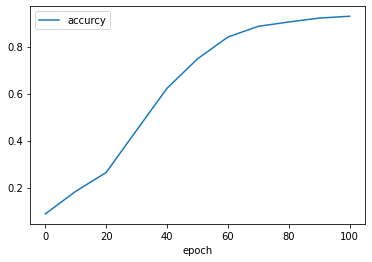


model : 
    Sequential(
      (0): Linear(in_features=64, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=16, bias=True)
      (3): ReLU()
      (4): Linear(in_features=16, out_features=10, bias=True)
    ) 
    0.weight    torch.Size([32, 64])
        tensor([[-0.0386,  0.0424,  0.1427,  ...,  0.0882,  0.0122,  0.0200],
            [-0.0517, -0.0193, -0. ...
    0.bias    torch.Size([32])
        tensor([ 0.1298,  0.0692,  0.1055, -0.0619,  0.0941,  0.0377,  0.0923,  0.0118,
             0.0163, -0. ...
    2.weight    torch.Size([16, 32])
        tensor([[-4.3551e-02,  5.9417e-03, -1.4865e-01,  6.3159e-02,  2.0611e-01,
             -1.2044e-01, -3.2 ...
    2.bias    torch.Size([16])
        tensor([ 0.2025,  0.1294, -0.1565,  0.2367, -0.0669,  0.0431,  0.1031,  0.0788,
            -0.1556,  0. ...
    4.weight    torch.Size([10, 16])
        tensor([[ 0.1643, -0.0931,  0.2027, -0.3382, -0.1392,  0.0694, -0.1093,  0.0324,
              0

In [3]:


model = nn.Sequential(
    nn.Linear(64, 32),  # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16),  # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10)  # hidden_layer3 = 16, output_layer = 10
)

mu.log("model", model)

X = digits.data  # 이미지. 즉, 특성 행렬
Y = digits.target  # 각 이미지에 대한 레이블

mu.log("len(X)", len(X))
mu.log("X[0].shape", X[0].shape)
mu.log("len(Y)", len(Y))
mu.log("Y[0].shape", Y[0].shape)

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
nb_epochs = 100
mu.plt_init()

for epoch in range(nb_epochs + 1):
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        accuracy = mu.get_cross_entropy_accuracy(y_pred, Y)
        mu.log_epoch(epoch, nb_epochs, loss, accuracy)

mu.plt_show()

mu.log("model", model)



--- 
 accuracy 측정 


In [4]:


with torch.no_grad():
    prediction = model(X)
    accuracy = mu.get_cross_entropy_accuracy(prediction, Y)
    mu.log("accuracy", accuracy)



accuracy : 0.9321090706733445


--- 
 랜덤 5 항목 테스트 


--------------------------------------------------------------------------------
r : 1202
X_single_data.shape : torch.Size([1, 64])

Y_single_data : 
    torch.Size([1]) tensor([3])

single_prediction : 
    torch.Size([1, 10]) tensor([[-6.3239, -1.9480, -4.1830, -2.0641, -5.5043, -1.9496, -9.7209,  0.1770,
             -4.0214, - ...

single_prediction_res : 7


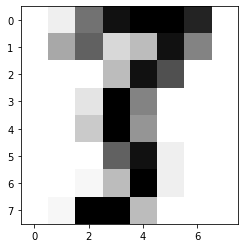

--------------------------------------------------------------------------------
r : 681
X_single_data.shape : torch.Size([1, 64])

Y_single_data : 
    torch.Size([1]) tensor([5])

single_prediction : 
    torch.Size([1, 10]) tensor([[-2.6195, -4.5324, -7.3956, -2.4989, -1.1333,  1.4262, -6.8636, -0.8967,
             -5.0274, - ...

single_prediction_res : 5


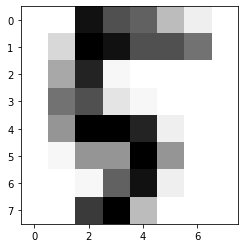

--------------------------------------------------------------------------------
r : 726
X_single_data.shape : torch.Size([1, 64])

Y_single_data : 
    torch.Size([1]) tensor([1])

single_prediction : 
    torch.Size([1, 10]) tensor([[-9.7471,  1.1683, -3.1973, -3.4741, -6.5825, -6.2609, -8.7387, -2.8321,
             -2.7860, - ...

single_prediction_res : 1


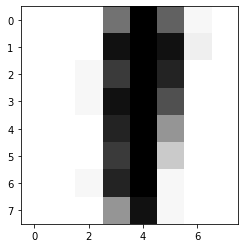

--------------------------------------------------------------------------------
r : 514
X_single_data.shape : torch.Size([1, 64])

Y_single_data : 
    torch.Size([1]) tensor([9])

single_prediction : 
    torch.Size([1, 10]) tensor([[-3.2779e-03, -6.4367e+00, -5.2869e+00, -1.5466e+00, -6.5648e+00,
             -3.0055e+00, -5.6 ...

single_prediction_res : 9


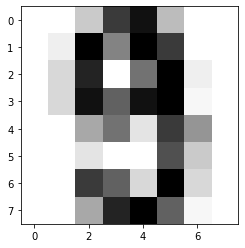

--------------------------------------------------------------------------------
r : 1037
X_single_data.shape : torch.Size([1, 64])

Y_single_data : 
    torch.Size([1]) tensor([8])

single_prediction : 
    torch.Size([1, 10]) tensor([[-4.1280, -3.5194, -2.5509, -3.2429, -4.0147, -5.5899, -6.5013, -2.0696,
             -0.3554, - ...

single_prediction_res : 8


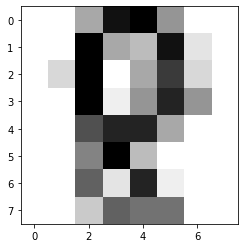

In [5]:


for _ in range(5):
    print("-" * 80)
    r = random.randint(0, len(X) - 1)
    mu.log("r", r)
    X_single_data = X[r:r + 1]
    mu.log("X_single_data.shape", X_single_data.shape)
    Y_single_data = Y[r:r + 1]
    mu.log("Y_single_data", Y_single_data)
    single_prediction = model(X_single_data)
    mu.log("single_prediction", single_prediction)
    single_prediction_res = torch.argmax(single_prediction, 1).item()
    mu.log("single_prediction_res", single_prediction_res)
    mu.plt_img_show(X_single_data.view(8, 8))
